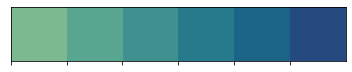

In [261]:
import os
import sys
import csv
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime, timedelta
from my_functions import *

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.ticker as ticker


c1, c2 = sns.color_palette("crest")[0], sns.color_palette("crest")[-1]

sns.palplot(sns.color_palette("crest"))

In [117]:
home_csvs = sorted(glob('/Users/maggie/Desktop/CompleteSummaries/CompleteHomes/*.csv'))

occ_df = {}

name_dict = {'A': '% Audio', 'E': '% Env', 'I': '% Images', 'I-dark': '% Dark'}
names = ['% Env', '% Audio', '% Images', '% Dark']

pd.set_option('display.float_format','{:.2f}'.format)

all_homes = []

for home in home_csvs:
    
    h = os.path.basename(home).strip('.csv')
    
    df = pd.read_csv(home)
#     df = df.dropna()
    df.drop(columns=['Minimum', 'include', 'occ'], inplace=True)
#     occ_df[h] = df.occ.mean()
    
#     df.drop(columns=['Minimum', 'include', 'occ'], inplace=True)
    df_avg = df.mean(axis=0)

    col_names = list(df.columns)
    hubs = list(set([col.split('_')[0] for col in col_names if col[1] == 'S']))
    
    hub_dfs = []
    
    for hub in sorted(hubs):
        sub_cols = df_avg.filter(like=hub, axis=0)
        hub_df = pd.DataFrame(sub_cols).transpose()
        cols = list(hub_df.columns)
        hub_df.columns = [col.split('_')[1] for col in cols]
        hub_df = hub_df.rename(columns=name_dict)
        hub_df.index = [f'SH{hub[2]}']
        hub_dfs.append(hub_df)
        
    home_summary = pd.concat(hub_dfs, axis=0)
    home_summary['Home'] = h
    
    home_summary = home_summary.set_index(['Home', home_summary.index])
    all_homes.append(home_summary)
    
summary_df = pd.concat(all_homes, axis=0)
summary_df.to_csv('/Users/maggie/Desktop/all_days_summary_df.csv')


          date  RS1_E  RS1_A  RS1_I  RS1_I-dark  RS2_E  RS2_A  RS2_I  \
0   2019-11-05   0.30   0.31   0.32        0.03   0.21   0.19   0.19   
1   2019-11-06   0.95   0.95   1.00        0.40   0.96   0.96   1.00   
2   2019-11-07   0.94   0.95   1.00        0.43   0.97   0.97   1.00   
3   2019-11-08   0.91   0.93   1.00        0.29   0.97   0.97   1.00   
4   2019-11-09   0.93   0.94   1.00        0.43   0.97   0.97   1.00   
5   2019-11-10   0.93   0.95   1.00        0.37   0.95   0.97   1.00   
6   2019-11-11   0.94   0.95   1.00        0.33   0.97   0.97   1.00   
7   2019-11-12   0.90   0.95   1.00        0.39   0.96   0.96   1.00   
8   2019-11-13   0.94   0.94   1.00        0.58   0.98   0.97   1.00   
9   2019-11-14   0.78   0.95   1.00        0.47   0.97   0.97   1.00   
10  2019-11-15   0.94   0.95   1.00        0.43   0.98   0.98   1.00   
11  2019-11-16   0.94   0.95   1.00        0.55   0.96   0.97   1.00   
12  2019-11-17   0.95   0.95   1.00        0.43   0.95   0.96   

In [254]:
csv_path = sorted(glob('/Users/maggie/Desktop/HPD_mobile_data/HPD-env/HPD_mobile-H1/H1-red/RS*/CSV/*-11-22.csv'))

dfs = []

for p in csv_path:
    hub = os.path.basename(p).strip('.csv').split('_')[1]
    print(p)
    df = pd.read_csv(p)
#     print(df)
    
    
    
    df['date'] = df.timestamp
    df['date'] = pd.to_datetime(df['date']) 
    df.insert(loc=0, column='day', value=df['date'].dt.date)
    df.insert(loc=1, column='hr_min_sec', value=df['date'].dt.time)
    df['hr'] = pd.to_datetime(df['hr_min_sec'].astype(str))
    df.insert(loc=2, column='hub', value=hub)
    df.drop(columns=['date', 'timestamp'], inplace=True)
    dfs.append(df)

# print(df)

# d1 = df.day[1]
# d2 = df.day[68000]
# print(d1, d2)


# df = df.loc[(df['day'] == d1)]
# print(df)
#     dfs.append(df)
full_df = pd.concat(dfs, axis=0)
print(full_df)
#     df.reset_index(inplace=True, drop=True)

/Users/maggie/Desktop/HPD_mobile_data/HPD-env/HPD_mobile-H1/H1-red/RS1/CSV/H1_RS1_2019-11-22.csv
/Users/maggie/Desktop/HPD_mobile_data/HPD-env/HPD_mobile-H1/H1-red/RS2/CSV/H1_RS2_2019-11-22.csv
/Users/maggie/Desktop/HPD_mobile_data/HPD-env/HPD_mobile-H1/H1-red/RS3/CSV/H1_RS3_2019-11-22.csv
/Users/maggie/Desktop/HPD_mobile_data/HPD-env/HPD_mobile-H1/H1-red/RS4/CSV/H1_RS4_2019-11-22.csv
/Users/maggie/Desktop/HPD_mobile_data/HPD-env/HPD_mobile-H1/H1-red/RS5/CSV/H1_RS5_2019-11-22.csv
               day hr_min_sec  hub  tvoc_ppb  temp_c  rh_percent  light_lux  \
0       2019-11-05   15:38:00  RS1         0   25.20       29.70     894.00   
1       2019-11-05   15:38:10  RS1         0   24.10       31.10     905.00   
2       2019-11-05   15:38:20  RS1         0   24.10       31.00     887.00   
3       2019-11-05   15:38:30  RS1         0   24.10       31.00     887.00   
4       2019-11-05   15:38:40  RS1         0   24.10       31.00     898.00   
...            ...        ...  ...       

In [218]:
mpl_update = {
    'font.size': 20,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'figure.figsize': [9,6],
    'axes.labelsize': 32,
    'axes.titlesize': 32,
    'lines.linewidth': 4,
    'legend.markerscale':6.0,
    'legend.fontsize': 24
}
plt.rcParams.update(mpl_update)

c1, c2 = sns.color_palette("crest")[0], sns.color_palette("crest")[-1]

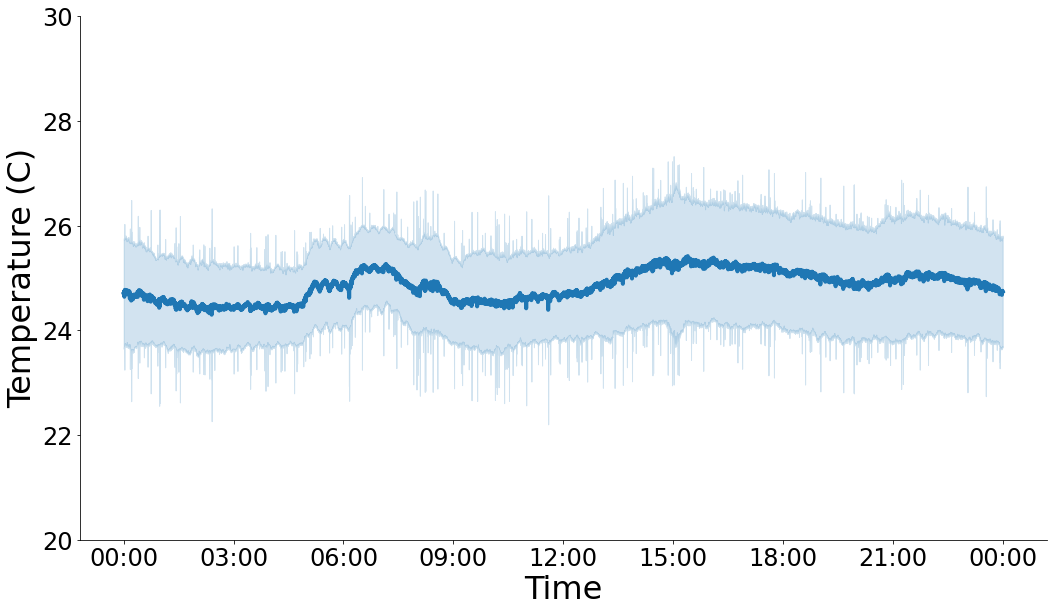

AttributeError: 'Line2D' object has no property 'height'

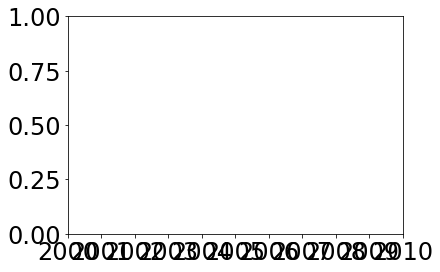

In [265]:
# # plt.figure(figsize=(14,10))
# ax = fig.add_subplot(1,1,1)
# ax = sns.relplot(x="hr_min_sec", y="temp_c", 
#             kind="line", estimator="mean",  ci="sd", 
# #             hue="hub",
#             height=12, aspect=2.3,
                 
#             data=df);

# ax.set(xlabel='Time', ylabel='Temperature (C)', ylim = [15,30])

# plt.show()





# g = sns.catplot(x="time", y="pulse", hue="kind", col="diet", data=exercise)

# # format the labels with f-strings
# for ax in g.axes.flat:
#     ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:.2f}: Oh baby, baby'))
#     ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x}: Is that your best'))






ax = sns.relplot(x="hr", y="temp_c", 
            kind="line", estimator="mean",  ci="sd", 
            height=8, aspect=1.8,
            data=full_df);

# ax.set(xlabel='Time', ylabel='Temperature (C)', ylim = [15,30])

for a in ax.axes.flat:
#     fig.autofmt_xdate()
    date_form = DateFormatter("%H:%M")
    a.xaxis.set_major_formatter(ticker.FuncFormatter(date_form))
#     fig.autofmt_xdate()
    ax.set(xlabel='Time', ylabel='Temperature (C)', ylim = [20,30])

plt.show()   
    
#     ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
# ax.set_title("Custom tick formatter")
# fig.autofmt_xdate()
# plt.show()














ax = sns.relplot(x="hr", y="temp_c", 
            kind="line", estimator="mean",  ci="sd", 
            height=8, aspect=1.8,
            data=df);

# ax.set(xlabel='Time', ylabel='Temperature (C)', ylim = [15,30])

for a in ax.axes.flat:
#     fig.autofmt_xdate()
    date_form = DateFormatter("%H:%M")
    a.xaxis.set_major_formatter(ticker.FuncFormatter(date_form))
#     fig.autofmt_xdate()
    ax.set(xlabel='Time', ylabel='Temperature (C)', ylim = [20,30])

plt.show()   

In [234]:
df.hr_min_sec[0]

datetime.time(15, 38)

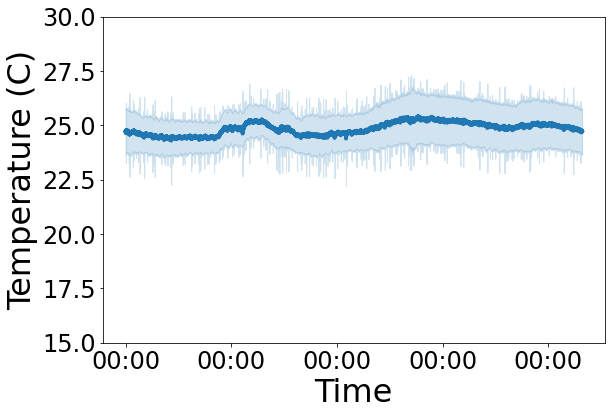

In [248]:
ax = sns.lineplot(x="hr_min_sec", y="temp_c", data=full_df, estimator="mean", ci='sd')
#             
# #             hue="hub",
#             height=12, aspect=2.3, 
#             data=full_df);

ax.set(xlabel='Time', ylabel='Temperature (C)', ylim = [15,30])




date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)

# plt.show()

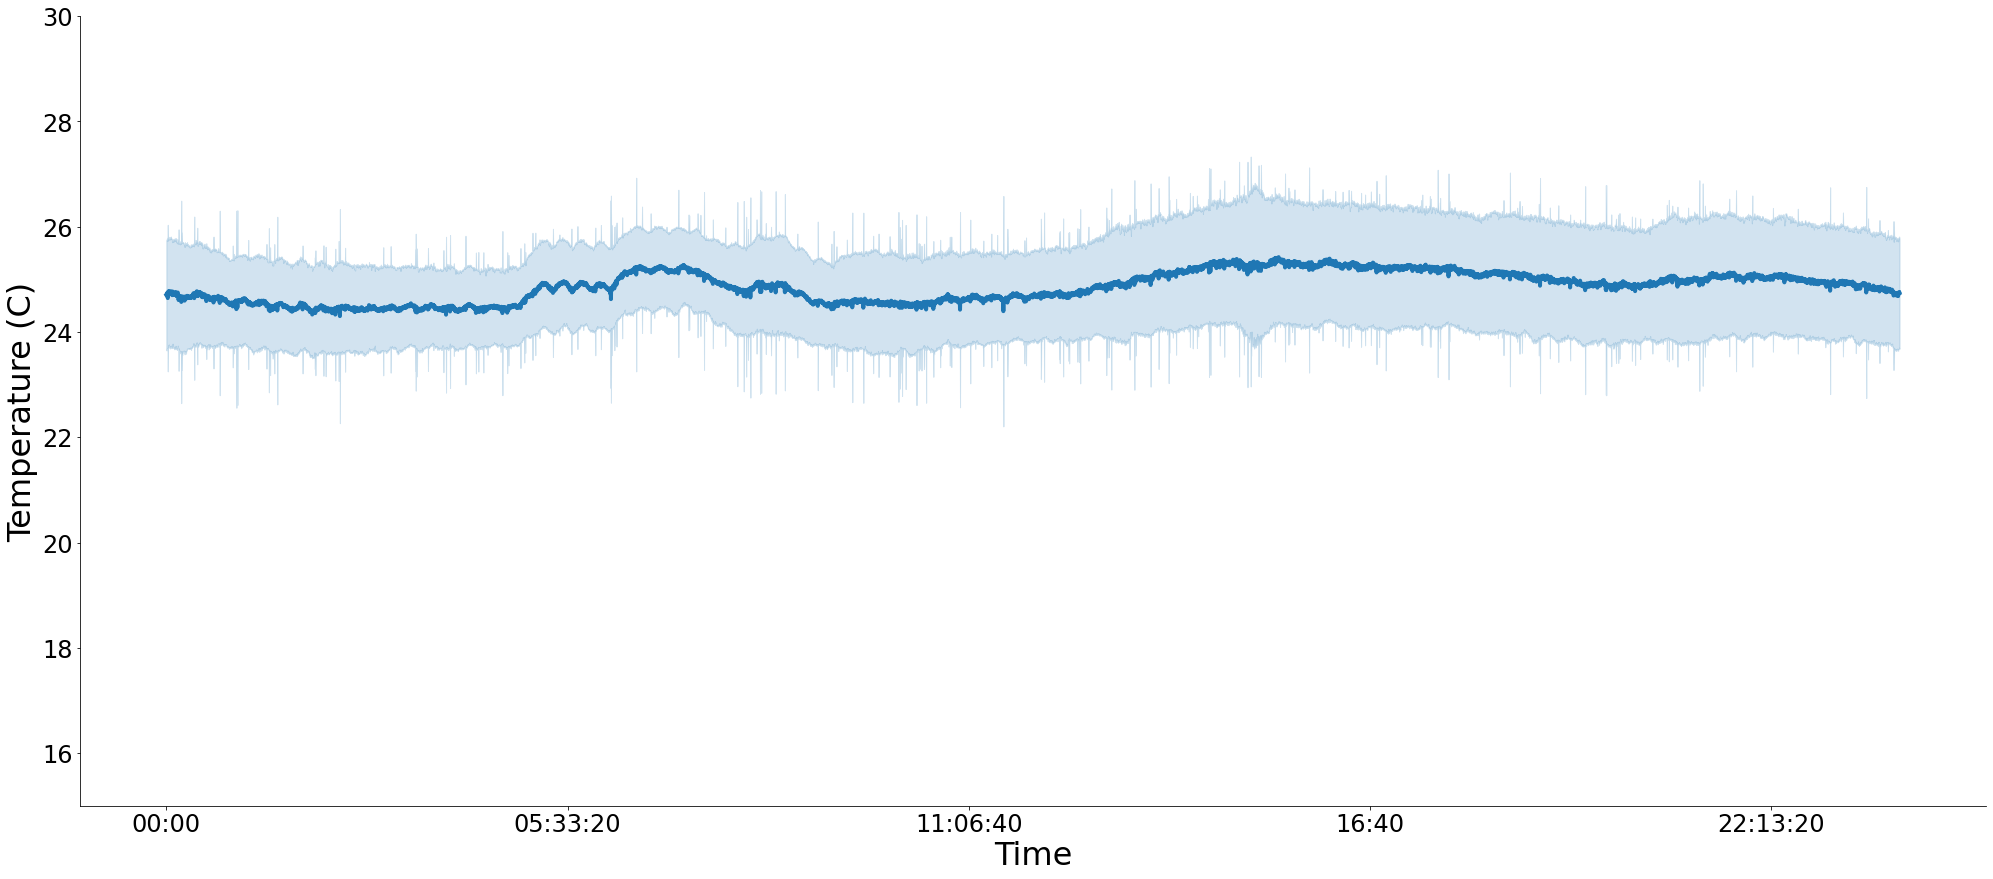

In [220]:
# ax = sns.lineplot(x='timestamp', y='temp_c', data=df)#, linewidth=0.0005, height=6, aspect=2.7, s=20)
# ax.set(xlim=(df['timestamp'].min(), df['timestamp'].max()), ylim=(20,35))
# plt.xlabel('Time')
# plt.ylabel('Temperature (C)')


# sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);



# def print_step(ys, yq, step=0, save=False):
# #     plt.clf()
# #     c1, c2 = sns.color_palette("crest")[0], sns.color_palette("crest")[-1]
    
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     y = np.linspace(0,10,len(ys))
    
#     plt.plot(y,ys, label='Noise', color=c1)
#     plt.plot(y, yq, label='Quiet', alpha=0.6, color=c2)
    
#     plt.xlabel('Time (s)')
#     plt.ylabel('Amplitude')

#     plt.legend()
#     plt.tight_layout()
#     sns.despine()
    
#     if save:
#         target_fname = f'audio_step{step}.pdf'
#         target_dir = make_storage_directory(f'/Users/maggie/Desktop/Audio_plots/')
#         plt.savefig(os.path.join(target_dir, target_fname))
#     else:
#         plt.show()

In [153]:

df = df.iloc[df['day'] == datetime.strptime('2019-11-06', '%Y-%m-%d')]
print(df)

# gt_day = groundTruth.loc[groundTruth['day'] == day]

Empty DataFrame
Columns: [day, hr_min_sec, hub, tvoc_ppb, temp_c, rh_percent, light_lux, co2eq_ppm, dist_mm, co2eq_base, tvoc_base]
Index: []
